In [2]:
#Setup
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

# Lab 2
## Probability, Distributions, and Statistical Questions

#### **Problem 1**

For this problem we are going to imagine that we are looking for gamma-ray sources.  In this kind of telescope there is a background of cosmic-rays that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.
##### **A) Show how the probability distribution of the background changes as you integrate (sum) for more days.**

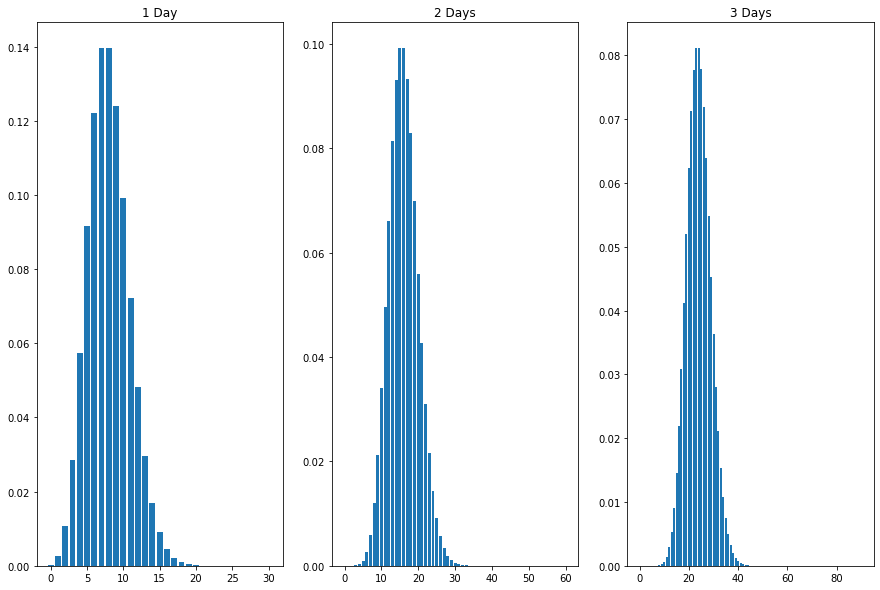

In [3]:
X = 8
Y = 12
vals = range(0,31)
p1 = stats.poisson.pmf(vals,X)
p2 = p1
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.bar(vals,p1)
x2 = range(0,61)
for i in range(0,1):
    p2 = scipy.signal.fftconvolve(p2,stats.poisson.pmf(vals,X))
ax2.bar(x2,p2)
x3 = range(0,91)
p3 = stats.poisson.pmf(vals,X)
for i in range(0,2):
    p3 = scipy.signal.fftconvolve(p3,stats.poisson.pmf(vals,X))
ax3.bar(x3,p3)
ax1.title.set_text('1 Day')
ax2.title.set_text('2 Days')
ax3.title.set_text('3 Days')
plt.show()

##### **B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**

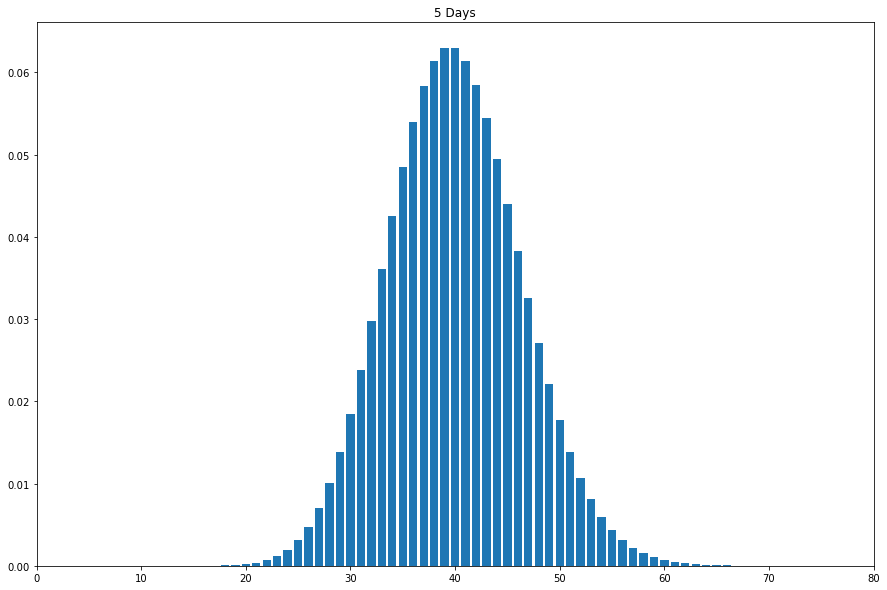

Mean: 40.0 Variance: 40.0


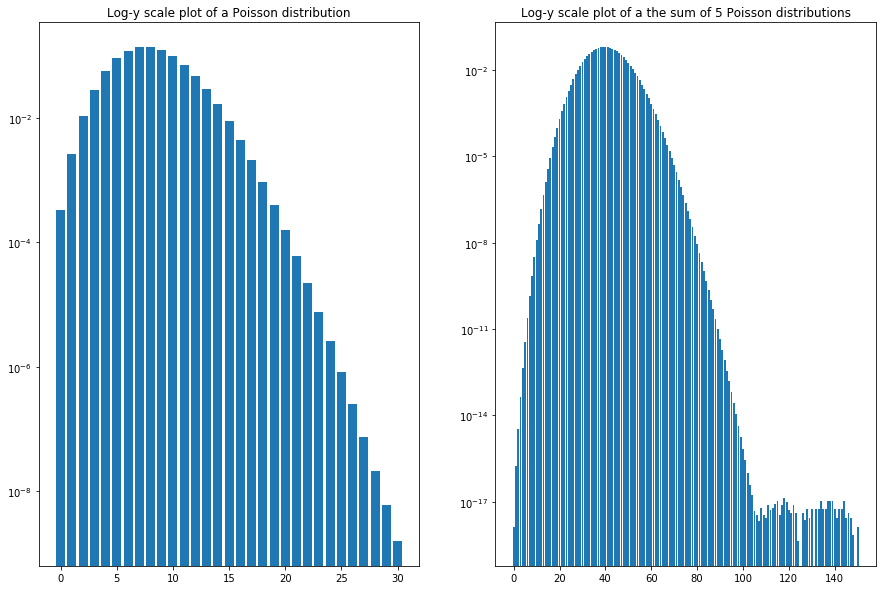

In [4]:
fig, ax = plt.subplots(1,1)
x5 = range(0,151)
p5 = stats.poisson.pmf(vals,X)
for i in range(0,4):
    p5 = scipy.signal.fftconvolve(p5,stats.poisson.pmf(vals,X))
ax.bar(x5,p5)
ax.title.set_text('5 Days')
plt.xlim([0,80])
plt.show()
ex = sum(x5*p5)
ex2 = sum(p5*np.square(x5))
var = ex2-ex**2
print('Mean:', np.round(ex,4), 'Variance:', np.round(var,4))
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(vals,p1)
ax2.bar(x5,p5)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.title.set_text('Log-y scale plot of a Poisson distribution')
ax2.title.set_text('Log-y scale plot of a the sum of 5 Poisson distributions')

The mean and variance of the above distribution are both n*$\mu$ which is consistent with a poisson distribution. Also log plots of the distributions give the same general shape. The noise on the upper values of the sum is consistent with rounding errors at around $10^{-17}$.

##### **C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger.**

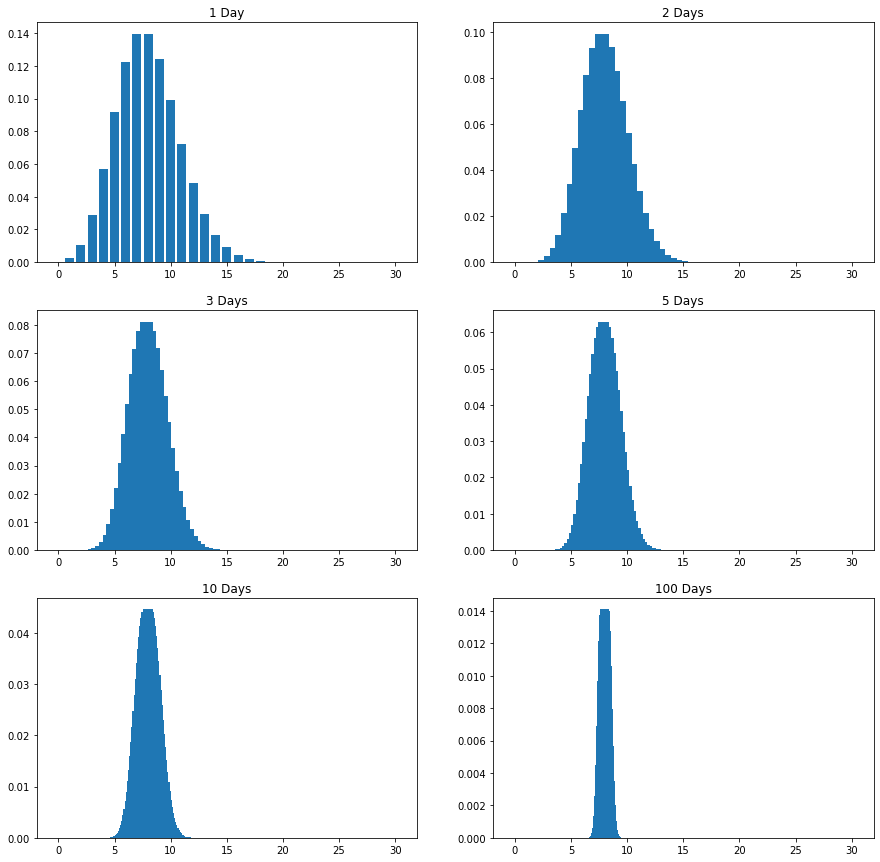

In [5]:
plt.rcParams["figure.figsize"] = (15,15)
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
ax1.bar(vals,p1)
x2 = np.linspace(0,30,61)
ax2.bar(x2,p2)
x3 = np.linspace(0,30,91)
ax3.bar(x3,p3)
x5 = np.linspace(0,30,151)
ax4.bar(x5,p5)
ax1.title.set_text('1 Day')
ax2.title.set_text('2 Days')
ax3.title.set_text('3 Days')
ax4.title.set_text('5 Days')
x10 = np.linspace(0,30,301)
p10 = stats.poisson.pmf(vals,X)
for i in range(0,9):
    p10 = scipy.signal.fftconvolve(p10,stats.poisson.pmf(vals,X))
ax5.bar(x10,p10)
x100 = np.linspace(0,30,3001)
p100 = stats.poisson.pmf(vals,X)
for i in range(0,99):
    p100 = scipy.signal.fftconvolve(p100,stats.poisson.pmf(vals,X))
ax6.bar(x100,p100)
ax5.title.set_text('10 Days')
ax6.title.set_text('100 Days')
plt.show()

As the number of days averaged increases, the width of the resulting distribution narrows. The distribution also becomes more smooth, this is to be expected because the number of data points is increasing and each bars width is getting smaller. The central limit theorem states that the average of any repeated measurement will follow a normal distribution centered at the mean of the distribution it was pulled from.

##### **D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation.**

In [6]:
#Number of days N
N = 5
expected = N*Y
vals = range(0,51)
p10 = stats.poisson.pmf(vals,X)
for i in range(0,4):
    p10 = scipy.signal.fftconvolve(p10,stats.poisson.pmf(vals,X))
prob = np.sum(p10[expected:])
sigma = 1- stats.norm.ppf(prob)
print('Sigma of', expected, 'or more measurements in 5 days is', sigma)

Sigma of 60 or more measurements in 5 days is 3.8976868676379297


#### **Problem 2**
Using a Chi Squared distribution with 14 degrees of freedom.
##### **A) Show how the distribution changes as you average over more observing intervals.**

In [7]:
x = np.linspace(0,60,401)
p1 = stats.chi2.pdf(x,df = 14)

p2 = p1
for i in range(0,4):
    p2 = scipy.signal.fftconvolve(p2,p1)
x2 = np.linspace(0,60,2001)

p3 = p1
for i in range(0,9):
    p3 = scipy.signal.fftconvolve(p3,p1)
x3 = np.linspace(0,60,4001)

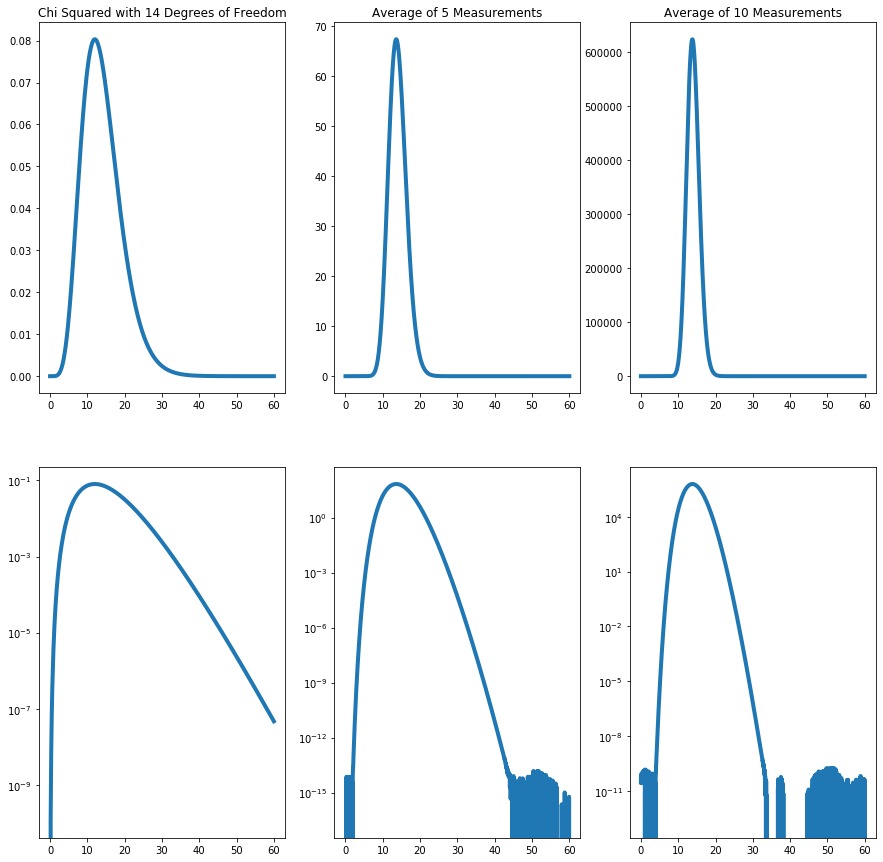

In [8]:
#Plotting
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.plot(x,p1,linewidth = 4)
ax2.plot(x2,p2,linewidth = 4)
ax3.plot(x3,p3,linewidth = 4)
ax4.plot(x,p1,linewidth = 4)
ax5.plot(x2,p2,linewidth = 4)
ax6.plot(x3,p3,linewidth = 4)
ax4.set_yscale('log')
ax5.set_yscale('log')
ax6.set_yscale('log')
ax1.title.set_text('Chi Squared with 14 Degrees of Freedom')
ax2.title.set_text('Average of 5 Measurements')
ax3.title.set_text('Average of 10 Measurements')
plt.show()

##### **B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**
After 10 averaged measurements the plot starts to look significantly less skewed and a little gausian looking, but the right tail is still long.

In [9]:
x1 = np.linspace(5,25,301)
p4 = p1
for i in range(0,19):
    p4 = scipy.signal.fftconvolve(p4,p1)
x4 = np.linspace(0,60,len(p4))
p5 = p1
for i in range(0,49):
    p5 = scipy.signal.fftconvolve(p5,p1)
x5 = np.linspace(0,60,len(p5))
np5 = p5/sum(p5)
sigma = np.sqrt(sum(np.square(x5)*np5)-sum(x5*np5)**2)
mean = sum(x5*np5)
pg = stats.norm.pdf(x1, loc = mean, scale = sigma)
pg = pg * max(p5)/max(pg)

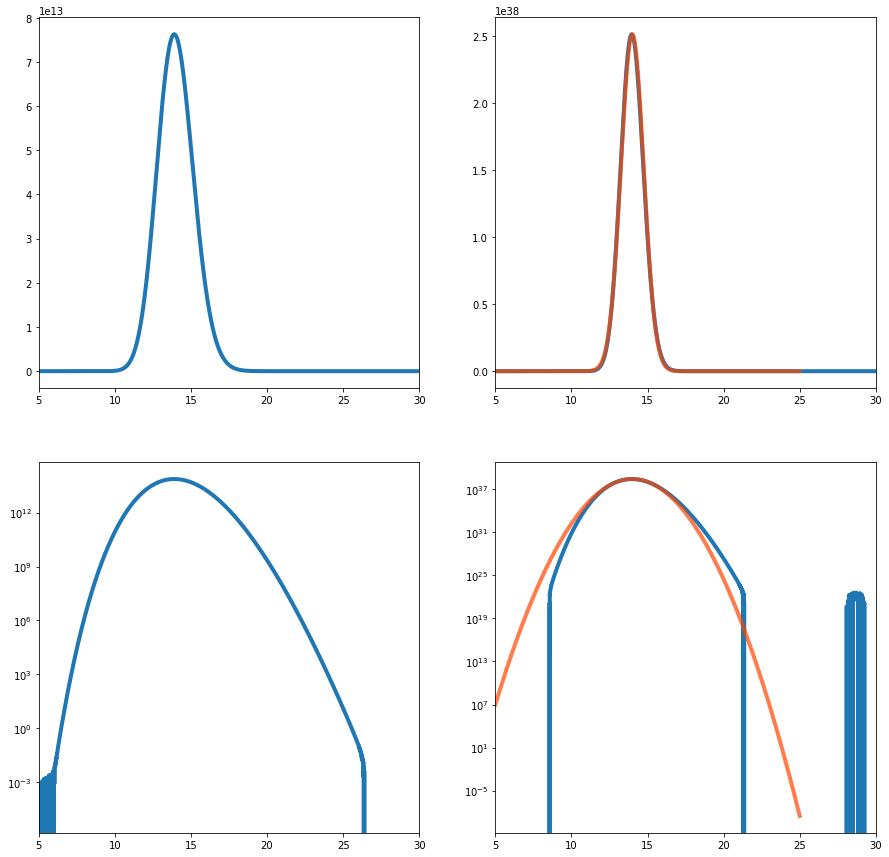

In [10]:
#Plotting
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(x4,p4,linewidth = 4)
ax2.plot(x5,p5,linewidth = 4)
ax2.plot(x1,pg, alpha = 0.7, linewidth = 4, color = 'orangered')
ax3.plot(x4,p4,linewidth = 4)
ax4.plot(x5,p5,linewidth = 4)
ax4.plot(x1,pg, alpha = 0.7, linewidth = 4,color = 'orangered')
ax3.set_yscale('log')
ax4.set_yscale('log')
ax1.set_xlim([5,30])
ax2.set_xlim([5,30])
ax3.set_xlim([5,30])
ax4.set_xlim([5,30])
plt.show()

After about 20 measurements, the average looks much more gaussian than with less measurements, but still has a longer right tail than left. The overlaid gaussian was made using the expected value, and standard deviation calculated from the 50 measurement distribution. Even with 50 measurements, the distribution is still skew right.
#### **Problem 3**
##### **Version 1**
##### **A) Assuming you see a signal of strength Y . Calculate the significance of your detection. Can you claim a discovery?**

In [11]:
X = 5
Y = 23.5
prob = stats.norm.cdf(Y,loc = 0, scale = X)
sigma = stats.norm.ppf(prob)
print('sigma:',np.round(sigma,3))

sigma: 4.7


A measurement with intensity 23.5, from an image with a background distribution width of 5 cannot be claimed as a discovery. The sigma value was close at 4.7 but since the standard is 5 sigma or more to claim a discovery, a higher intensity would be needed.
##### **Version 2**
##### **B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background?**
Given the background distribution with width 5, what is the significance of obtaining an observation with intensity of 23.5 from 10,000 observations?
$$10000 * \int_{23.5}^{\infty}\frac{1}{5\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x}{5}\right)^2}dx$$
The equation above gives the number of events with an intensity of 23.5 or higher that is expected from 10,000 measurements.

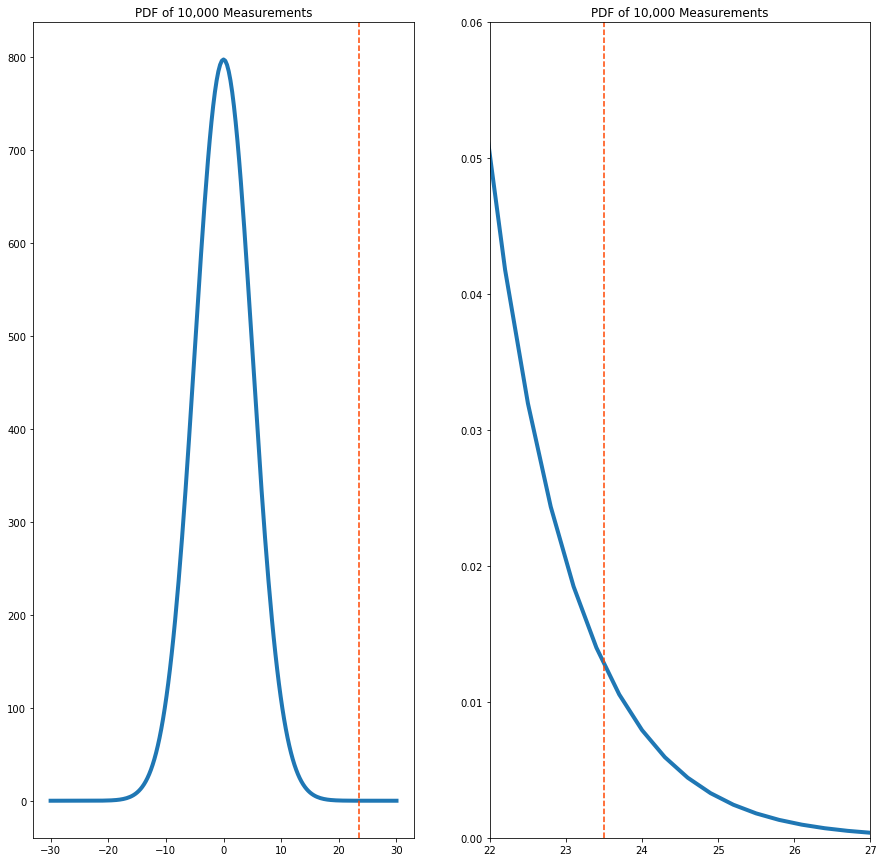

In [12]:
x1 = np.linspace(-30,30,201)
p1 = stats.norm.pdf(x1,scale = 5)*10000
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,p1,linewidth = 4)
ax1.axvline(23.5, c = 'orangered', linestyle = '--')
ax2.plot(x1,p1,linewidth = 4)
ax2.axvline(23.5, c = 'orangered', linestyle = '--')
ax2.set_xlim([22,27])
ax2.set_ylim([0,0.06])
ax1.title.set_text('PDF of 10,000 Measurements')
ax2.title.set_text('PDF of 10,000 Measurements')
plt.show()

The plots above show the probability distribution function for 10,000 measurements, and the vertical line in orange is at the spot of the measurement. This is to illustrate the general magnitude of the area to the right of this point. The plot on the right is the same plot with different limits to further illustrate that the area to the right of the line is quite small dispite the curve having a high peak.
##### **C)**

In [13]:
prob10 = 10000*(1-prob)
sigma10 = stats.norm.ppf(1-prob10)
print('Number of expected measurements of intensity of 23.5 or greater is', np.round(prob10,5), '\nSigma of a measurement of 23.5 from 10000:',np.round(sigma10,5))

Number of expected measurements of intensity of 23.5 or greater is 0.01301 
Sigma of a measurement of 23.5 from 10000: 2.22597


#### **Problem 4**
##### **A) Calculate the signal required for a 5-sigma detection in Version 1**

In [14]:
prob_5sigma = stats.norm.cdf(5)
measurement1 = stats.norm.ppf(prob_5sigma, scale = 5)
print('5 Sigma measurement looking at 1 pixel:',np.round(measurement1,5))

5 Sigma measurement looking at 1 pixel: 25.0


A measurement of 25 would make sense as the $\sigma$ is 5 so $5\sigma$ is 25. This was found by finding the probability that corresponds to 5$\sigma$ in the standard normal and using the inverse cdf or ppf function to find the value of the background distribution with that probability.

##### **B) Calculate the signal required for a 5-sigma detection in Version 2**
probability of 5 sigma event = 
$$10000*\int_{a}^{\infty}\frac{1}{5\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x}{5}\right)^2}dx$$ 
probability of 5 sigma event / 10000 = $\int_{a}^{\infty}\frac{1}{5\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x}{5}\right)^2}dx$

In [15]:
measurement2 = stats.norm.ppf((1-((1-prob_5sigma)/10000)), scale = 5)
print('5 Sigma measurement looking at 10000 pixels:',np.round(measurement2,3))

5 Sigma measurement looking at 10000 pixels: 32.753


##### **C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**
With a trials factor of 10,000 the measurement was only ~ 1.3 times larger. Since we are looking at measurements with a gaussian background this small change is understandable. The gaussian distribution falls off quickly at the tails, so as you move in x the probability density can change 4 orders of magnitude quickly. In this case specifically only a change of almost 8 made such a change.
##### **D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**

In [16]:
measurement3 = stats.norm.ppf((1-((1-prob_5sigma)/100000000)), scale = 5)
print('5 Sigma measurement looking at 100,000,000 pixels:',np.round(measurement3,3))

5 Sigma measurement looking at 100,000,000 pixels: 39.044


In [17]:
measurement1 = stats.norm.ppf(prob_5sigma, scale = 5)
measurement2 = stats.norm.ppf((1-(1-prob_5sigma)/10), scale = 5)
measurement3 = stats.norm.ppf((1-(1-prob_5sigma)/100), scale = 5)
measurement4 = stats.norm.ppf((1-(1-prob_5sigma)/1000), scale = 5)
measurement5 = stats.norm.ppf((1-(1-prob_5sigma)/10000), scale = 5)
print('1:',measurement1)
print('2:',measurement2, 'delta:',measurement2-measurement1)
print('3:',measurement3, 'delta:',measurement3-measurement2)
print('4:', measurement4, 'delta:',measurement4-measurement3)
print('5:',measurement5, 'delta:',measurement5-measurement4)

1: 24.99999999985088
2: 27.134670016840946 delta: 2.134670016990068
3: 29.121822730499186 delta: 1.98715271365824
4: 30.98800406120194 delta: 1.866181330702755
5: 32.752687434458274 delta: 1.7646833732563323


For 4 additional orders of magnitude more measurements the 5 $\sigma$ measurement only got ~7 higher. The first 4 orders of magnitude of increase had a similar change as the second 4 orders of magnitude. This suggests a logarithmic relationship. The change does fall off as the order of magnitude increases.

##### **Extra Credit**

In [16]:
measurement1 = stats.chi2.ppf(prob_5sigma, df = 14)
measurement2 = stats.chi2.ppf((1-(1-prob_5sigma)/10), df = 14)
measurement3 = stats.chi2.ppf((1-(1-prob_5sigma)/100), df = 14)
measurement4 = stats.chi2.ppf((1-(1-prob_5sigma)/1000), df = 14)
measurement5 = stats.chi2.ppf((1-(1-prob_5sigma)/10000), df = 14)
print('1:',measurement1)
print('2:',measurement2, 'delta:',measurement2-measurement1)
print('3:',measurement3, 'delta:',measurement3-measurement2)
print('4:', measurement4, 'delta:',measurement4-measurement3)
print('5:',measurement5, 'delta:',measurement5-measurement4)

1: 57.77797787772192
2: 63.46791884254045 delta: 5.6899409648185255
3: 69.05029510969908 delta: 5.5823762671586294
4: 74.5458342834787 delta: 5.495539173779619
5: 79.96962336085076 delta: 5.423789077372064


In [19]:
measurement1 = stats.expon.ppf(prob_5sigma)
measurement2 = stats.expon.ppf((1-(1-prob_5sigma)/10))
measurement3 = stats.expon.ppf((1-(1-prob_5sigma)/100))
measurement4 = stats.expon.ppf((1-(1-prob_5sigma)/1000))
measurement5 = stats.expon.ppf((1-(1-prob_5sigma)/10000))
print('1:',measurement1)
print('2:',measurement2, 'delta:',measurement2-measurement1)
print('3:',measurement3, 'delta:',measurement3-measurement2)
print('4:', measurement4, 'delta:',measurement4-measurement3)
print('5:',measurement5, 'delta:',measurement5-measurement4)

1: 15.064998393834038
2: 17.367583488764623 delta: 2.302585094930585
3: 19.67016858950482 delta: 2.3025851007401954
4: 21.972753605037365 delta: 2.3025850155325465
5: 24.275337923416775 delta: 2.3025843183794095


The chi squared has a roughly logaritmic relationship, but the delta falls off as the order of magnitudes increase. The exponential on the otherhand appears to have a purely logarithmic relationship. The chi squared distribution then appears to be more similar to the gaussian distribution in terms of trial factor, while the exponential distribution is purely logarithmic. This may have something to do with the probability distribution function for a gaussian having a term on the order of $e^{-x^2}$, and the chi squared having an $x^{df}$ term.